# Profitable Free App profiles from Google and Apple stores
---
We are trying to analyze the profiles of apps google and apple stores. I work at a company as data analyst that builds Android and iOS mobile apps.

We only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means our revenue for any given app is mostly influenced by the number of users who use our app — the more users that see and engage with the ads, the better. Our goal is to analyze data and understand what type of apps are likely to attract users which ultimately can help our team of developers.

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we should first try to see if we can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for our goals:

- __[A data set](https://www.kaggle.com/lava18/google-play-store-apps)__ containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. You can download the data set directly from __[this link](https://www.dq-content.s3.amazonnaws.com/350/googleplaystore.csv)__.
- __[A data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)__ containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. You can download the data set directly from __[this link](https://www.dq-content.s3.amazonnaws.com/350/AppleStore.csv)__.

In [20]:
from csv import reader
import matplotlib.pyplot as plt
import numpy as np

### open googleplaystore dataset ###
opened_file = open("googleplaystore.csv")
read_file = reader(opened_file)
google_data = list(read_file)
google_header = google_data[0]
google_data = google_data[1:]

### open applestore dataset ###
opened_file = open("AppleStore.csv")
from csv import reader
read_file = reader(opened_file)
ios_data = list(read_file)
ios_header = ios_data[0]
ios_data = ios_data[1:]

In [21]:
### Function to understand the basic information of data
def explore_data(dataset,start,end,row_and_columns=False): # To display the first x number of rows
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')
    if row_and_columns:
        print('Number of rows: ',len(dataset))
        print('Number of columns: ', len(dataset[0]))

In [22]:
print("Google Play Store - data sample")
print(google_header)
print('\n')
explore_data(google_data,0,3,True)

Google Play Store - data sample
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows:  10841
Number of columns:  13


In [23]:
print("Apple Store - data sample")
print(ios_header)
print('\n')
explore_data(ios_data,0,3,True)

Apple Store - data sample
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows:  7197
Number of columns:  16


In [24]:
print(google_data[10472])
print('\n')
print(google_header)
print('\n')
print(google_data[0])

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


In [25]:
print(len(google_data))
del google_data[10472] # deleting inconsistent row
print(len(google_data))

10841
10840


In [26]:
### Function to identify duplicate rows in the dataset
def duplicate_rows_check(dataset,n): # n is the column with expected duplicate values
    unique_names = []
    duplicate_names = []
    duplicate_names_freq = {}
    for row in dataset:
        name = row[n]
        if name in unique_names:
            duplicate_names.append(name)
        else:
            unique_names.append(name)
            
    for name in duplicate_names:
        if name in duplicate_names_freq:
            duplicate_names_freq[name] += 1
        else:
            duplicate_names_freq[name] = 2
    print(' Length of duplicate entries:',len(duplicate_names),'\n','Length of unique entries:', len(unique_names))
    print('Duplicate Entries Frequency Table:',duplicate_names[:5])
print('\n','Google Dataset Duplicate Data','\n')
duplicate_rows_check(google_data,0)
print('\n','Apple Dataset Duplicate Data','\n')
duplicate_rows_check(ios_data,0)
            


 Google Dataset Duplicate Data 

 Length of duplicate entries: 1181 
 Length of unique entries: 9659
Duplicate Entries Frequency Table: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings']

 Apple Dataset Duplicate Data 

 Length of duplicate entries: 0 
 Length of unique entries: 7197
Duplicate Entries Frequency Table: []


In [27]:
### Function to remove duplicate rows in the dataset
def remove_duplicates(dataset,duplicate_row_index,remove_criteria_index): # duplicate row index is name column and remove criteria is reviews
    reviews_max = {}
    for row in dataset:
        name = row[duplicate_row_index]
        reviews = float(row[remove_criteria_index])
        if name in reviews_max and reviews > reviews_max[name]:
            reviews_max[name] = reviews
        elif name not in reviews_max:
            reviews_max[name] = reviews
    cleaned_data = []
    already_added = []
    for row in dataset:
        name = row[duplicate_row_index]
        reviews = float(row[remove_criteria_index])
        if (reviews == reviews_max[name]) and (name not in already_added):
            cleaned_data.append(row)
            already_added.append(name)
    return cleaned_data
Google_Cleaned_Data = remove_duplicates(google_data,0,3)
print(len(google_data)-1181)
print(len(Google_Cleaned_Data))

9659
9659


In [28]:
### Function to extract english apps
def is_english(string):
    not_ascii = 0
    for character in string:
        if ord(character)>127: # as per ascii standards all the english alphabets are < 127
            not_ascii += 1
    if not_ascii > 3:
        return False
    else:
        return True
is_english('Docs To Go™ Free Office Suite') # for example
android_english = []
ios_english = []
### Removing non-english apps using above function
for row in Google_Cleaned_Data:
    name = row[0]
    if is_english(name):
        android_english.append(row)
for row in ios_data:
    name = row[1]
    if is_english(name):
        ios_english.append(row)
explore_data(android_english,0,3,True)
print('\n')
explore_data(ios_english,0,3,True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows:  9614
Number of columns:  13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+'

In [29]:
    android_final = []
    ios_final = []
    ### Removing non free apps from the dataset
    for row in android_english:
        price = row[7]
        if price == '0':
            android_final.append(row)
    for row in ios_english:
        price = row[4]
        if price == '0.0':
            ios_final.append(row)
    print(len(android_final))
    print(len(ios_final))

8864
3222


our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

- Build a minimal Android version of the app, and add it to Google Play.
- If the app has a good response from users, we develop it further.
- If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful on both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

In [30]:
print(google_header)
print(android_final[0])
print('\n')
print(ios_header)
print(ios_final[0])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


## Apple Apps

Games : 58.16%
Entertainment : 7.88%
Photo & Video : 4.97%
Education : 3.66%
Social Networking : 3.29%
Shopping : 2.61%
Utilities : 2.51%
Sports : 2.14%
Music : 2.05%
Health & Fitness : 2.02%
Productivity : 1.74%
Lifestyle : 1.58%
News : 1.33%
Travel : 1.24%
Finance : 1.12%
Weather : 0.87%
Food & Drink : 0.81%
Reference : 0.56%
Business : 0.53%
Book : 0.43%
Navigation : 0.19%
Medical : 0.19%
Catalogs : 0.12%


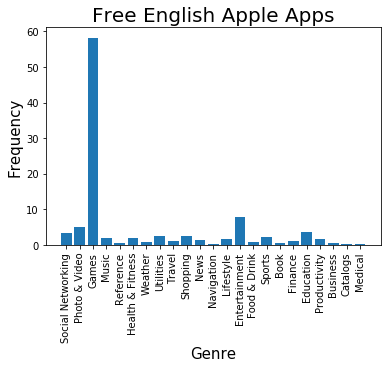

In [31]:
### Function to create frequency datatables and sort them accordingly
def sorted_freq_table(dataset,index):
    table_freq = {}
    for row in dataset:
        name = row[index]
        if name in table_freq:
            table_freq[name] += 1
        else:
            table_freq[name] = 1
    # percentage calculation
    for key in table_freq:
        table_freq[key] = table_freq[key]*100/len(dataset)
    table_display = []
    for key in table_freq:
        table_freq_astuple = (table_freq[key],key)
        table_display.append(table_freq_astuple)
    table_sorted = sorted(table_display,reverse=True)
    for entry in table_sorted:
        print(entry[1],":",'{:.2f}%'.format(entry[0]))
    return table_freq

ios_genre_freq = sorted_freq_table(ios_final,11)
# Bar Graph
Keys = list(ios_genre_freq.keys())
Values = list(ios_genre_freq.values())
index = np.arange(len(ios_genre_freq))
plt.bar(index,Values,tick_label=Keys)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90)
plt.title('Free English Apple Apps',fontsize=20)
plt.show()


Based on the initial analysis it is evident that majority of apps in apple store are for fun i.e., Games, Entertainment, photo & Video etc. Launching an apps in this genre requires us to develop something universal and compete with some gaint companies. Developing such app requires lot of expertise advice and money. Also keep in mind, higher percentage of a particular genre doesn't mean we have high number of users, more detail. Considering the scarcity of data, below, we calculate the average number of user ratings per app genre on the App Store:

Social Networking :  71548.35
Photo & Video :  28441.54
Games :  22788.67
Music :  57326.53
Reference :  74942.11
Health & Fitness :  23298.02
Weather :  52279.89
Utilities :  18684.46
Travel :  28243.80
Shopping :  26919.69
News :  21248.02
Navigation :  86090.33
Lifestyle :  16485.76
Entertainment :  14029.83
Food & Drink :  33333.92
Sports :  23008.90
Book :  39758.50
Finance :  31467.94
Education :  7003.98
Productivity :  21028.41
Business :  7491.12
Catalogs :  4004.00
Medical :  612.00


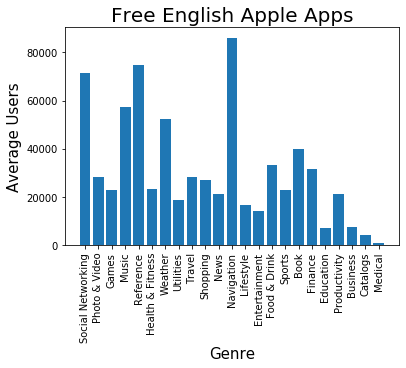

In [32]:
ios_genre_user_freq = {}
for genre in ios_genre_freq:
    total = 0
    len_genre = 0
    for row in ios_final:
        genre_app = row[11]
        if genre_app == genre:
            total += float(row[5])
            len_genre += 1
    avg_users = total/len_genre
    print(genre,": ",'{:.2f}'.format(avg_users))
    ios_genre_user_freq[genre] = avg_users
Keys = list(ios_genre_user_freq.keys())
Values = list(ios_genre_user_freq.values())
index = np.arange(len(ios_genre_user_freq))
plt.bar(index,Values,tick_label=Keys)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Average Users', fontsize=15)
plt.xticks(rotation=90)
plt.title('Free English Apple Apps',fontsize=20)
plt.show()

As we are trying to understand the most populous genre it is highly possible for some of the most dominant apps to skew the data, so we need to further investigate some of the populous genres, see below:

In [33]:
print('------------------Navigation------------------')
for app in ios_final:
    if app[11]=='Navigation':
        print(app[1],': ',app[5])
print('------------------Reference------------------')
for app in ios_final:
    if app[11]=='Reference':
        print(app[1],': ',app[5])
print('------------------Social Networking------------------')
for app in ios_final:
    if app[11]=='Social Networking':
        print(app[1],': ',app[5])
print('------------------Weather------------------')
for app in ios_final:
    if app[11]=='Weather':
        print(app[1],': ',app[5])
print('------------------Book------------------')
for app in ios_final:
    if app[11]=='Book':
        print(app[1],': ',app[5])
print('------------------Music------------------')
for app in ios_final:
    if app[11]=='Music':
        print(app[1],': ',app[5])
        

------------------Navigation------------------
Waze - GPS Navigation, Maps & Real-time Traffic :  345046
Google Maps - Navigation & Transit :  154911
Geocaching® :  12811
CoPilot GPS – Car Navigation & Offline Maps :  3582
ImmobilienScout24: Real Estate Search in Germany :  187
Railway Route Search :  5
------------------Reference------------------
Bible :  985920
Dictionary.com Dictionary & Thesaurus :  200047
Dictionary.com Dictionary & Thesaurus for iPad :  54175
Google Translate :  26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran :  18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition :  17588
Merriam-Webster Dictionary :  16849
Night Sky :  12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) :  8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools :  4693
GUNS MODS for Minecraft PC Edition - Mods Tools :  1497
Guides for Pokémon GO - Pokemon GO News and Cheats :  826
WWDC :  76

Genres that seem popular include naviation, weather, reference, book, food and drink, or finance. The book and reference genre seem to overlap a bit with each other and there is potential for combination app, but the other genres don't seem too interesting to us:

Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market a bit.

## Google Apps

FAMILY : 18.91%
GAME : 9.72%
TOOLS : 8.46%
BUSINESS : 4.59%
LIFESTYLE : 3.90%
PRODUCTIVITY : 3.89%
FINANCE : 3.70%
MEDICAL : 3.53%
SPORTS : 3.40%
PERSONALIZATION : 3.32%
COMMUNICATION : 3.24%
HEALTH_AND_FITNESS : 3.08%
PHOTOGRAPHY : 2.94%
NEWS_AND_MAGAZINES : 2.80%
SOCIAL : 2.66%
TRAVEL_AND_LOCAL : 2.34%
SHOPPING : 2.25%
BOOKS_AND_REFERENCE : 2.14%
DATING : 1.86%
VIDEO_PLAYERS : 1.79%
MAPS_AND_NAVIGATION : 1.40%
FOOD_AND_DRINK : 1.24%
EDUCATION : 1.16%
ENTERTAINMENT : 0.96%
LIBRARIES_AND_DEMO : 0.94%
AUTO_AND_VEHICLES : 0.93%
HOUSE_AND_HOME : 0.82%
WEATHER : 0.80%
EVENTS : 0.71%
PARENTING : 0.65%
ART_AND_DESIGN : 0.64%
COMICS : 0.62%
BEAUTY : 0.60%


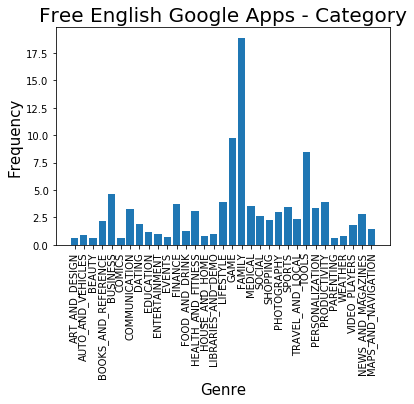



Tools : 8.45%
Entertainment : 6.07%
Education : 5.35%
Business : 4.59%
Productivity : 3.89%
Lifestyle : 3.89%
Finance : 3.70%
Medical : 3.53%
Sports : 3.46%
Personalization : 3.32%
Communication : 3.24%
Action : 3.10%
Health & Fitness : 3.08%
Photography : 2.94%
News & Magazines : 2.80%
Social : 2.66%
Travel & Local : 2.32%
Shopping : 2.25%
Books & Reference : 2.14%
Simulation : 2.04%
Dating : 1.86%
Arcade : 1.85%
Video Players & Editors : 1.77%
Casual : 1.76%
Maps & Navigation : 1.40%
Food & Drink : 1.24%
Puzzle : 1.13%
Racing : 0.99%
Role Playing : 0.94%
Libraries & Demo : 0.94%
Auto & Vehicles : 0.93%
Strategy : 0.91%
House & Home : 0.82%
Weather : 0.80%
Events : 0.71%
Adventure : 0.68%
Comics : 0.61%
Beauty : 0.60%
Art & Design : 0.60%
Parenting : 0.50%
Card : 0.45%
Casino : 0.43%
Trivia : 0.42%
Educational;Education : 0.39%
Board : 0.38%
Educational : 0.37%
Education;Education : 0.34%
Word : 0.26%
Casual;Pretend Play : 0.24%
Music : 0.20%
Racing;Action & Adventure : 0.17%
Puzzle

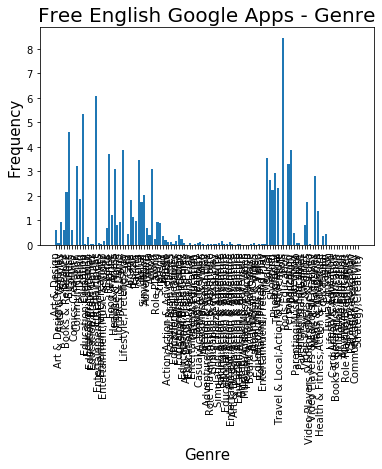

In [34]:
android_category_freq = sorted_freq_table(android_final,1)
Keys = list(android_category_freq.keys())
Values = list(android_category_freq.values())
index = np.arange(len(android_category_freq))
plt.bar(index,Values,tick_label=Keys)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90)
plt.title('Free English Google Apps - Category',fontsize=20)
plt.show()
print('\n')
android_genre_freq = sorted_freq_table(android_final,9)
Keys = list(android_genre_freq.keys())
Values = list(android_genre_freq.values())
index = np.arange(len(android_genre_freq))
plt.bar(index,Values,tick_label=Keys)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90)
plt.title('Free English Google Apps - Genre',fontsize=20)
plt.show()

Similar analysis is carried out for android apps and one thing is clear that genre column is more granular. So, the cateogory is used to analyize further. Based on initial analysis/graph it is evident that google apps are more balanced and seems like regular apps are more popular contradicting what we found in the ios apps. From further investigation it is found that most of the apps from Family category are children game apps. Now we'd like to get an idea about the kind of apps that have most users. In this case, we have data about the number of installs for the Google Play market, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.).
For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to find out which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on. To perform computations, however, we'll need to convert each install number from string to float. This means we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error. So we use loops and replace function to save the installs for each genre.

ART_AND_DESIGN :  1986335.09
AUTO_AND_VEHICLES :  647317.82
BEAUTY :  513151.89
BOOKS_AND_REFERENCE :  8767811.89
BUSINESS :  1712290.15
COMICS :  817657.27
COMMUNICATION :  38456119.17
DATING :  854028.83
EDUCATION :  1833495.15
ENTERTAINMENT :  11640705.88
EVENTS :  253542.22
FINANCE :  1387692.48
FOOD_AND_DRINK :  1924897.74
HEALTH_AND_FITNESS :  4188821.99
HOUSE_AND_HOME :  1331540.56
LIBRARIES_AND_DEMO :  638503.73
LIFESTYLE :  1437816.27
GAME :  15588015.60
FAMILY :  3695641.82
MEDICAL :  120550.62
SOCIAL :  23253652.13
SHOPPING :  7036877.31
PHOTOGRAPHY :  17840110.40
SPORTS :  3638640.14
TRAVEL_AND_LOCAL :  13984077.71
TOOLS :  10801391.30
PERSONALIZATION :  5201482.61
PRODUCTIVITY :  16787331.34
PARENTING :  542603.62
WEATHER :  5074486.20
VIDEO_PLAYERS :  24727872.45
NEWS_AND_MAGAZINES :  9549178.47
MAPS_AND_NAVIGATION :  4056941.77


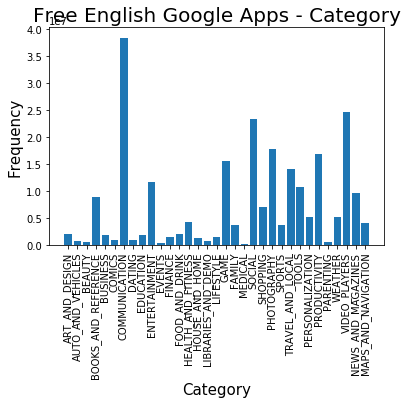

In [35]:
android_category_user_freq = {}
for genre in android_category_freq:
    total = 0
    len_genre = 0
    for row in android_final:
        genre_app = row[1]
        if genre_app == genre:
            reviews = row[5]
            reviews = reviews.replace('+','')
            reviews = reviews.replace(',','')
            total += float(reviews)
            len_genre += 1
    avg_users = total/len_genre
    print(genre,": ",'{:.2f}'.format(avg_users))
    android_category_user_freq[genre] = avg_users

Keys = list(android_category_user_freq.keys())
Values = list(android_category_user_freq.values())
index = np.arange(len(android_category_user_freq))
plt.bar(index,Values,tick_label=Keys)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90)
plt.title('Free English Google Apps - Category',fontsize=20)
plt.show()

In [36]:
print('------------------COMMUNICATION------------------')
for app in android_final:
    if app[1]=='COMMUNICATION':
        print(app[0],': ',app[5])

print('------------------BOOKS_AND_REFERENCE------------------')
for app in android_final:
    if app[1]=='BOOKS_AND_REFERENCE':
        print(app[0],': ',app[5])


------------------COMMUNICATION------------------
WhatsApp Messenger :  1,000,000,000+
Messenger for SMS :  10,000,000+
My Tele2 :  5,000,000+
imo beta free calls and text :  100,000,000+
Contacts :  50,000,000+
Call Free – Free Call :  5,000,000+
Web Browser & Explorer :  5,000,000+
Browser 4G :  10,000,000+
MegaFon Dashboard :  10,000,000+
ZenUI Dialer & Contacts :  10,000,000+
Cricket Visual Voicemail :  10,000,000+
TracFone My Account :  1,000,000+
Xperia Link™ :  10,000,000+
TouchPal Keyboard - Fun Emoji & Android Keyboard :  10,000,000+
Skype Lite - Free Video Call & Chat :  5,000,000+
My magenta :  1,000,000+
Android Messages :  100,000,000+
Google Duo - High Quality Video Calls :  500,000,000+
Seznam.cz :  1,000,000+
Antillean Gold Telegram (original version) :  100,000+
AT&T Visual Voicemail :  10,000,000+
GMX Mail :  10,000,000+
Omlet Chat :  10,000,000+
My Vodacom SA :  5,000,000+
Microsoft Edge :  5,000,000+
Messenger – Text and Video Chat for Free :  1,000,000,000+
imo fre

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs. See the average of the communication apps without skewed data.

In [37]:
comm_under100M = []
for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace('+','')
    n_installs = n_installs.replace(',','')
    if app[1] == 'COMMUNICATION' and float(n_installs)<100000000:
        comm_under100M.append(float(n_installs))
comm_avg = sum(comm_under100M)/len(comm_under100M)
print(comm_avg)

3603485.3884615386


ART_AND_DESIGN :  1986335.09
AUTO_AND_VEHICLES :  647317.82
BEAUTY :  513151.89
BOOKS_AND_REFERENCE :  1437212.22
BUSINESS :  1226918.74
COMICS :  817657.27
COMMUNICATION :  3603485.39
DATING :  854028.83
EDUCATION :  1833495.15
ENTERTAINMENT :  6118250.00
EVENTS :  253542.22
FINANCE :  1086125.79
FOOD_AND_DRINK :  1924897.74
HEALTH_AND_FITNESS :  2005713.66
HOUSE_AND_HOME :  1331540.56
LIBRARIES_AND_DEMO :  638503.73
LIFESTYLE :  1152128.78
GAME :  6272564.69
FAMILY :  2342897.53
MEDICAL :  120550.62
SOCIAL :  3084582.52
SHOPPING :  4640920.54
PHOTOGRAPHY :  7670532.29
SPORTS :  2994082.55
TRAVEL_AND_LOCAL :  2944079.63
TOOLS :  3191461.13
PERSONALIZATION :  2549775.83
PRODUCTIVITY :  3379657.32
PARENTING :  542603.62
WEATHER :  5074486.20
VIDEO_PLAYERS :  5544878.13
NEWS_AND_MAGAZINES :  1502841.88
MAPS_AND_NAVIGATION :  2484104.75


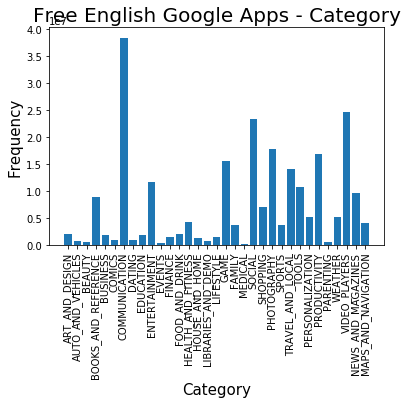

In [38]:
android_category_user_freq2 = {}
for genre in android_category_freq:
    total = 0
    len_genre = 0
    for row in android_final:
        genre_app = row[1]
        if genre_app == genre:
            reviews = row[5]
            reviews = reviews.replace('+','')
            reviews = reviews.replace(',','')
            if float(reviews)<100000000:
                total += float(reviews)
                len_genre += 1
    avg_users = total/len_genre
    print(genre,": ",'{:.2f}'.format(avg_users))
    android_category_user_freq2[genre] = avg_users

Keys = list(android_category_user_freq.keys())
Values = list(android_category_user_freq.values())
index = np.arange(len(android_category_user_freq))
plt.bar(index,Values,tick_label=Keys)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90)
plt.title('Free English Google Apps - Category',fontsize=20)
plt.show()

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. We can notice that quite few of apps are specially concentrating on a specific field like C, PhD, Quran, Bible etc. In order to attract users we need to provide additional features like dictionary, audio verison, quizzes on specific topic, group discussion etc.

## Conclusion

We started this project with the goal of recommending an app which is popular in the google market and ios store. 

After cleaning and doing a detailed analysis of the database and keeping in view of the goal of our app, it is recommended to develop a book genre app which needs to special features like dictionary, audio verison, quizzes on specific topic, group discussion etc to fight with the current apps.